In [50]:
import pandas as pd
dataset1=pd.read_csv('bdp.csv')
dataset1.head()

,Sl. No.,Pulse,Systolic Pressure,Diastolic Pressure
0,1,73,128,78
1,2,71,127,73
2,3,71,129,78
3,4,68,125,69
4,5,68,125,72


In [51]:
dataset1.isnull().sum()

Sl. No.               0
Pulse                 0
Systolic Pressure     0
Diastolic Pressure    0
dtype: int64

In [52]:
dataset1=dataset1.dropna(axis=1)
dataset1.head()

,Sl. No.,Pulse,Systolic Pressure,Diastolic Pressure
0,1,73,128,78
1,2,71,127,73
2,3,71,129,78
3,4,68,125,69
4,5,68,125,72


In [53]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Sl. No.             150 non-null    int64
 1   Pulse               150 non-null    int64
 2   Systolic Pressure   150 non-null    int64
 3   Diastolic Pressure  150 non-null    int64
dtypes: int64(4)
memory usage: 4.8 KB


In [54]:
dataset1.describe()

,Sl. No.,Pulse,Systolic Pressure,Diastolic Pressure
count,150.000000,150.000000,150.000000,150.000000
mean,75.500000,75.153333,124.406667,76.533333
std,43.445368,5.994110,4.000162,5.288542
min,1.000000,66.000000,109.000000,67.000000
25%,38.250000,71.000000,122.000000,73.000000
50%,75.500000,73.000000,125.000000,76.000000
75%,112.750000,78.750000,127.000000,79.750000
max,150.000000,93.000000,134.000000,92.000000


In [55]:
df=dataset1.drop(['Sl. No.'],axis=1)
df.head()

,Pulse,Systolic Pressure,Diastolic Pressure
0,73,128,78
1,71,127,73
2,71,129,78
3,68,125,69
4,68,125,72


In [56]:
x=df.iloc[:,:1]  #pulse
y=df.iloc[:,-1]  #diastolic
z=df.iloc[:,-2]  #systolic
z.head()

0    128
1    127
2    129
3    125
4    125
Name: Systolic Pressure, dtype: int64

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
l_train,l_test,r_train,r_test=train_test_split(x,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(l_train,r_train)

LinearRegression()

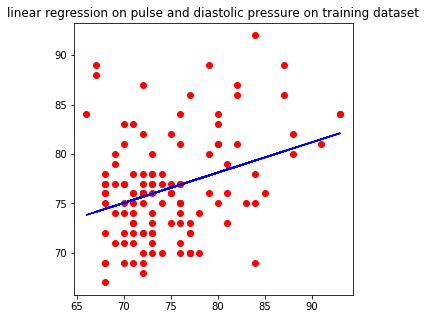

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(l_train,r_train,color='red')
plt.plot(l_train,lr.predict(l_train),color='blue')
plt.title('linear regression on pulse and diastolic pressure on training dataset')
plt.show()

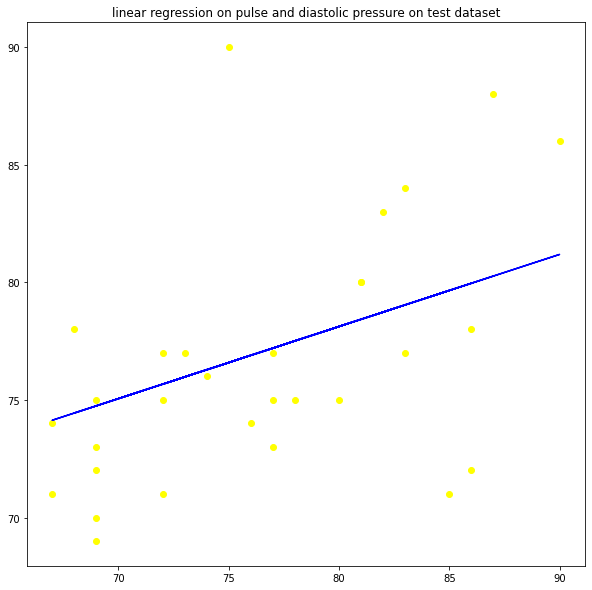

In [59]:
plt.figure(figsize=(10,10))
plt.scatter(l_test,r_test,color='yellow')
plt.plot(l_test,lr.predict(l_test),color='blue')
plt.title('linear regression on pulse and diastolic pressure on test dataset')
plt.show()

In [60]:
y1=df.iloc[:,1:3] 
x1=df.iloc[:,:-2] 
y1.head() 

,Systolic Pressure,Diastolic Pressure
0,128,78
1,127,73
2,129,78
3,125,69
4,125,72


In [61]:
x1.head()

,Pulse
0,73
1,71
2,71
3,68
4,68


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

In [63]:
lr.fit(x_train,y_train) #training the model

LinearRegression()

In [64]:
pred1=lr.predict(x_test) #TESTING THE MODEL
pred1

array([[124.85296044,  77.19957505],
       [123.79992588,  74.74903081],
       [123.53666724,  74.13639474],
       [123.53666724,  74.13639474],
       [123.79992588,  74.74903081],
       [124.72133112,  76.89325702],
       [126.5641416 ,  81.18170945],
       [125.37947772,  78.42484717],
       [125.64273636,  79.03748323],
       [125.905995  ,  79.65011929],
       [125.64273636,  79.03748323],
       [124.85296044,  77.19957505],
       [126.03762432,  79.95643732],
       [124.45807248,  76.28062096],
       [123.79992588,  74.74903081],
       [124.5897018 ,  76.58693899],
       [125.2478484 ,  78.11852914],
       [124.19481384,  75.6679849 ],
       [125.37947772,  78.42484717],
       [123.79992588,  74.74903081],
       [123.79992588,  74.74903081],
       [124.19481384,  75.6679849 ],
       [125.51110704,  78.7311652 ],
       [124.19481384,  75.6679849 ],
       [124.98458976,  77.50589308],
       [126.03762432,  79.95643732],
       [123.66829656,  74.44271278],
 

In [65]:
n=int(input())
x=[[n]]
pred=lr.predict(x)
pred

68


array([[123.66829656,  74.44271278]])

In [66]:
from sklearn.metrics import mean_squared_error

In [68]:
import numpy as np
rmse=np.sqrt(mean_squared_error(y_test,pred1))
rmse

4.610966686236843